In [178]:
import seaborn as sns
import pandas as pd
import json

In [179]:
df = {'count': [], 'time': [], 'threads': []}
for line in open('scorer.jsonl', 'rt'):
    data = json.loads(line)
    for time in data['times']:
        df['count'].append(data['count'])
        df['threads'].append(data['threads'])
        df['time'].append(time)
df = pd.DataFrame(df)

Text(4096, 162.7349772453308, 'n=4096\ntime=148ms')

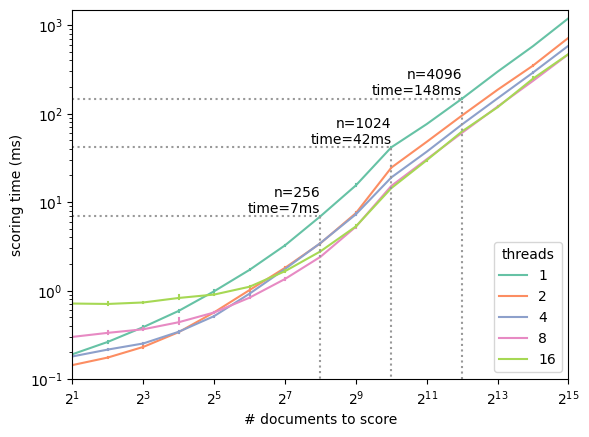

In [180]:
ax = sns.lineplot(df, x='count', y='time', hue='threads', err_style='bars', palette='Set2', errorbar=('ci', 99))
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)
ax.set_xlim(2, 2**15)
ax.set_ylim(1e-1, 1.5e3)
ax.set_ylabel('scoring time (ms)')
ax.set_xlabel('# documents to score')
ax.plot([2,n:=256,n], [m:=df[(df.threads==1) & (df['count']==n)].time.mean(), m, 0], ls=':', c='#999999')
ax.text(n, m*1.1, f'{n=}\ntime={round(m)}ms', ha='right')
ax.plot([2,n:=1024,n], [m:=df[(df.threads==1) & (df['count']==n)].time.mean(), m, 0], ls=':', c='#999999')
ax.text(n, m*1.1, f'{n=}\ntime={round(m)}ms', ha='right')
ax.plot([2,n:=4096,n], [m:=df[(df.threads==1) & (df['count']==n)].time.mean(), m, 0], ls=':', c='#999999')
ax.text(n, m*1.1, f'{n=}\ntime={round(m)}ms', ha='right')

In [152]:
df = {'num_results': [], 'latency': [], 'recall': []}
for line in open('bm25.jsonl', 'rt'):
    data = json.loads(line)
    for latency, recall in zip(data['latency'], data['recall']):
        df['num_results'].append(data['num_results'])
        df['latency'].append(latency)
        df['recall'].append(recall)
df = pd.DataFrame(df)

/tmp/ipykernel_3454227/713071653.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(df, x='num_results', y='latency', palette='Set2', errorbar=('pi', 95))


(0.001, 100.0)

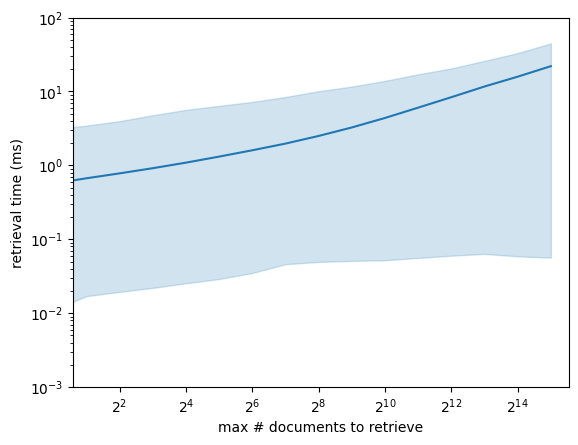

In [177]:
ax = sns.lineplot(df, x='num_results', y='latency', palette='Set2', errorbar=('pi', 95))
ax.set_ylabel('retrieval time (ms)')
ax.set_xlabel('max # documents to retrieve')
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)
ax.set_xlim(1.5, 2.05**15)
ax.set_ylim(1e-3, 1e2)

/tmp/ipykernel_3454227/2408195669.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(df, x='num_results', y='recall', err_style='bars', palette='Set2', errorbar=('ci', 99))


(0.0, 1.0)

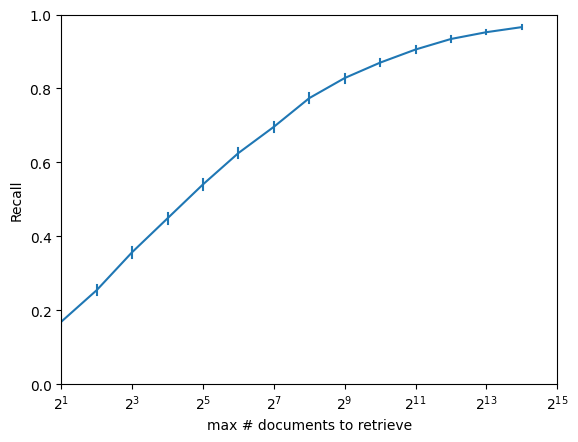

In [151]:
ax = sns.lineplot(df, x='num_results', y='recall', err_style='bars', palette='Set2', errorbar=('ci', 99))
ax.set_ylabel('Recall')
ax.set_xlabel('max # documents to retrieve')
ax.set_xscale('log', base=2)
ax.set_xlim(2, 2**15)
ax.set_ylim(0, 1)

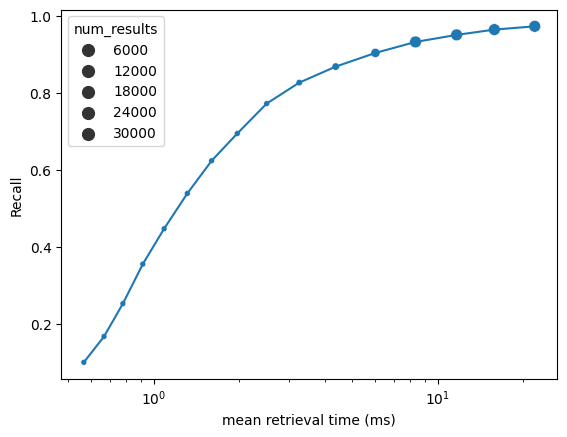

In [173]:
df2 = df.groupby('num_results').mean(['recall', 'latency'])
ax = sns.lineplot(df2, x='latency', y='recall')
sns.scatterplot(df2, x='latency', y='recall', size='num_results', ax=ax, size_norm=(2**8, 2**12))
ax.set_ylabel('Recall')
ax.set_xlabel('mean retrieval time (ms)')
ax.set_xscale('log', base=10)

In [200]:
df = {'time': [], 'threads': []}
fin = iter(open('colbert_query_encoder.jsonl', 'rt'))
next(fin)
for line in fin:
    data = json.loads(line)
    for time in data['latency']:
        df['threads'].append(data['num_threads'])
        df['time'].append(time)
df = pd.DataFrame(df)
df['time'] = df['time'] * 1000

(1.0, 16.0)

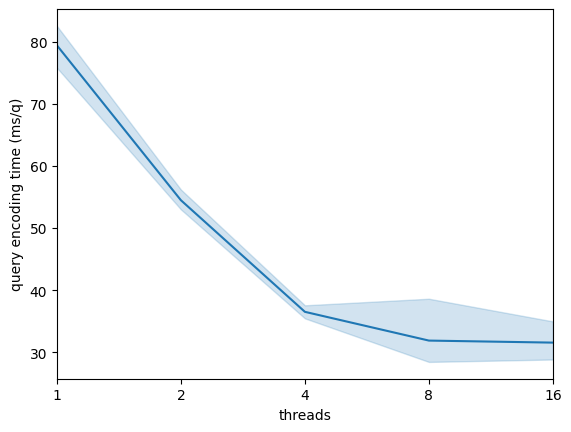

In [201]:
ax = sns.lineplot(df, x='threads', y='time', errorbar=('pi', 95))
ax.set_ylabel('query encoding time (ms/q)')
ax.set_xscale('log', base=2)
ax.set_xticks([1,2,4,8,16])
ax.set_xticklabels([1,2,4,8,16])
ax.set_xlabel('threads')
ax.set_xlim(1,16)